# Sentiment Analysis part

This notebook performs sentiment analysis on the cleaned reviews from the previous notebook.

# Setup

In [1]:
main_path = './'

In [14]:
!pip install -q langdetect
!pip install -q vaderSentiment
!pip install -q --upgrade transformers
!pip install -q torch
!pip install -q protobuf
!pip install -q googletrans==4.0.0-rc1
!pip install -q matplotlib
!pip install -q seaborn

import pandas as pd
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator

# Sentiment Analysis

The sentiment analysis is done using the VADER sentiment analysis tool. The reviews are first translated to English if they are not already in English. The sentiment score is then calculated for each review. The final output is a CSV file with the original reviews, the detected language, and the sentiment score.

### Load the Data

In [6]:
# Load the data
opentable_reviews = pd.read_csv(main_path + '/opentable_reviews_cleaned.csv')
yelp_reviews = pd.read_csv(main_path + 'yelp_reviews_cleaned.csv')

Sentiment analysis complete. Results saved to files.


In [ ]:
opentable_reviews.head()

In [ ]:
yelp_reviews.head()

### Define required methods

The following methods are used to detect the language of the reviews, translate them to English if needed, and calculate the sentiment score using VADER.

In [ ]:
# Initialize tools
vader_analyzer = SentimentIntensityAnalyzer()
translator = Translator()

# Detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Translate non-English reviews to English
def translate_to_english(text, lang):
    try:
        if lang == 'en':
            return text  # No translation needed
        translated = translator.translate(text, src=lang, dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating text: {text}. Error: {e}")
        return None

# Analyze sentiment using VADER
def analyze_sentiment(text):
    sentiment = vader_analyzer.polarity_scores(text)
    return sentiment['compound']  # Aggregate sentiment score

# Process the dataframe
def process_reviews(dataframe, source_name):
    dataframe['language'] = dataframe['text'].apply(detect_language)
    dataframe['translated_text'] = dataframe.apply(
        lambda row: translate_to_english(row['text'], row['language']), axis=1
    )
    dataframe['sentiment_score'] = dataframe['translated_text'].apply(analyze_sentiment)
    dataframe.drop(columns=['translated_text'], inplace=True)  # Remove translated_text from final output
    dataframe.to_csv(f"{source_name}_with_sentiment.csv", index=False)
    return dataframe

### Perform Sentiment Analysis

The sentiment analysis is performed on the reviews from OpenTable and Yelp.

The results are saved to CSV files.

In [ ]:
opentable_with_sentiment = process_reviews(opentable_reviews, 'opentable_reviews')
yelp_with_sentiment = process_reviews(yelp_reviews, 'yelp_reviews')

print("Sentiment analysis complete. Results saved to files.")

In [7]:
opentable_with_sentiment.head()

,review_id,restaurant_id,restaurant,text,date,language,sentiment_score
0,45775551,73093209,Restaurant Zo,"Being from out of town, its always worrisome t...",Dined 7 days ago,en,0.5808
1,43409730,73093209,Restaurant Zo,"the restaurant Zo was close, and it was far aw...","Dined on August 16, 2024",en,-0.7700
2,39410757,73093209,Restaurant Zo,Amazing dinner with friends. Food was deliciou...,"Dined on August 2, 2024",en,0.8910
3,32270298,73093209,Restaurant Zo,Dined on Thursday evening with group of 9 coll...,"Dined on April 18, 2024",en,0.9134
4,44992094,73093209,Restaurant Zo,Great food and staff was very friendly. Fun p...,"Dined on April 5, 2024",en,0.9036
...,...,...,...,...,...,...,...
159,82729024,74901488,Giusé Trattoria,Fantastic food slowish service but very nice w...,"Dined on October 5, 2024",en,0.7535
160,23676115,74901488,Giusé Trattoria,Food and service are good. The decoration is n...,"Dined on July 25, 2024",en,0.8750
161,8349462,82210366,Laïa,Amazing food in a very cool atmosphere!,"Dined on March 3, 2020",en,0.7707
162,15645011,82210366,Laïa,Une très belle découverte dans un cadre surpre...,"Dined on February 26, 2020",fr,0.9621


In [8]:
yelp_with_sentiment.head()

,review_id,restaurant_id,restaurant,text,date,language,sentiment_score
0,L7xKNDP5FD4gZWx3WeWn-g,4OsDhJHURGqfw1_22Gslgg,La Terrazza,My wife and I had dinner here last night. Wow!...,2023-05-27 23:26:51,en,0.8805
1,RU9YgRF4Y1dLEqBrBb3Tzg,4OsDhJHURGqfw1_22Gslgg,La Terrazza,One of the best fine dining restaurants we hav...,2023-08-24 13:48:40,en,0.9381
2,eGALOV7J-EKBm1Zb8Og-NQ,4OsDhJHURGqfw1_22Gslgg,La Terrazza,What an amazing view fantastic food and atmosp...,2019-10-10 12:09:42,en,0.9380
3,y8O3Lr-IlwfSfGJ2R3RqMw,O-PwNezcRXYyx2xiu9qVHQ,Bottega Rocchi,Great place great pizza food awesome staff. Q...,2019-05-09 02:56:11,en,0.9441
4,jVoTw2tImPJmGajp_XJ7Fw,O-PwNezcRXYyx2xiu9qVHQ,Bottega Rocchi,Simply put delicious and inexpensive. Fast fri...,2019-09-22 03:02:50,en,0.9117
...,...,...,...,...,...,...,...
174,Cf1O16iZXNiiqouo2EMl8w,NOHvG4ipWNsC8AN8nZ5fnA,Rifugio Romano,Huge diverse menu of vegan Italian food. The p...,2024-07-04 11:48:56,en,0.3182
175,bMQt3QyH_Ole5uVDQXYPAg,NOHvG4ipWNsC8AN8nZ5fnA,Rifugio Romano,As a vegan family traveling to Rome we were so...,2024-11-03 11:13:16,en,0.7793
176,W4qSyQBnBiCG4-ka0qsqIA,NOHvG4ipWNsC8AN8nZ5fnA,Rifugio Romano,Service was very slow and worst I've experienc...,2024-11-02 15:24:22,en,-0.1655
177,A8YFF9hrbufScb8ZrDGyHQ,yhkCHMLN4MKLOo1GavN7mg,Zero Settenta Cinque,PROS--kind and friendly staff welcoming to tra...,2024-03-14 04:01:38,en,0.7269


## Result visualization 

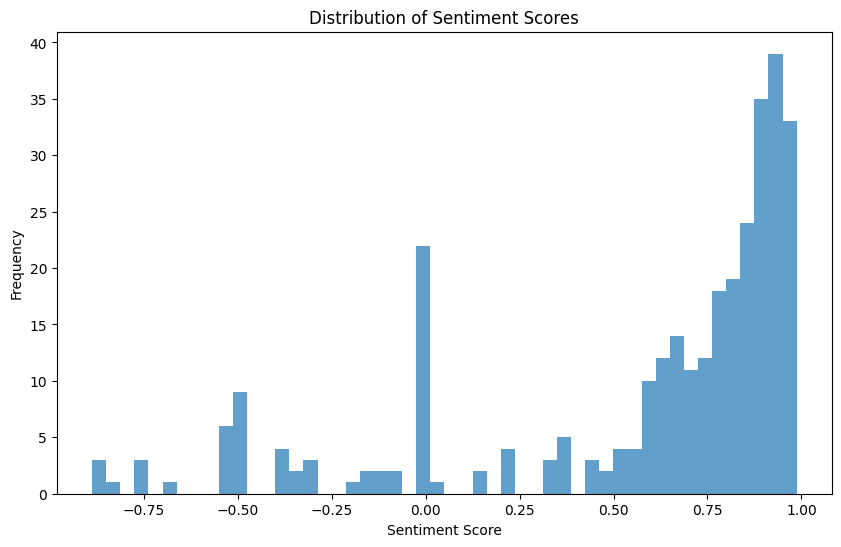

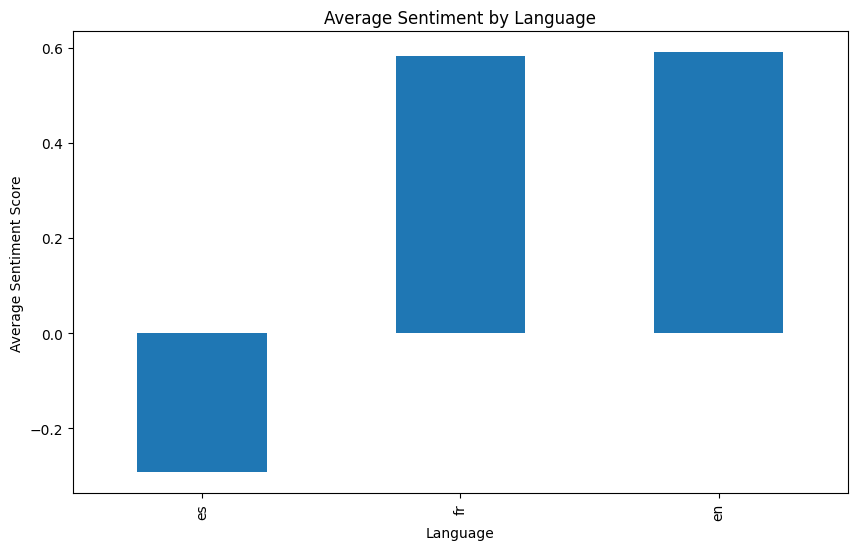

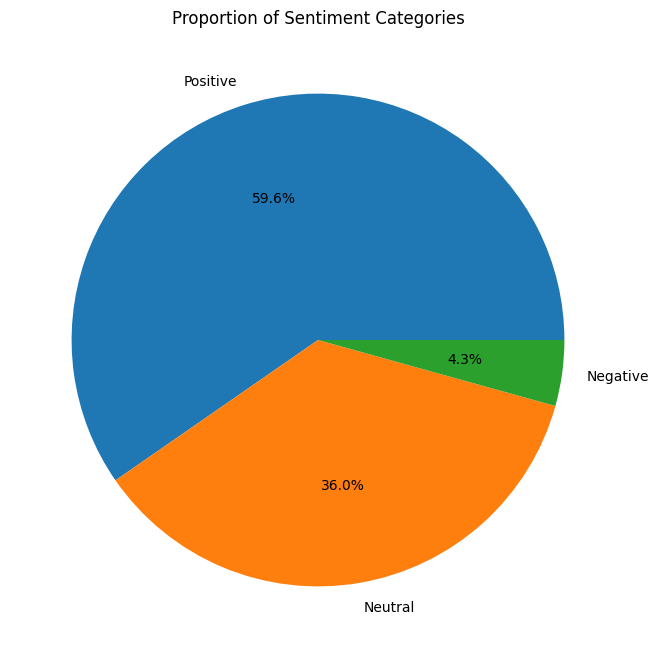

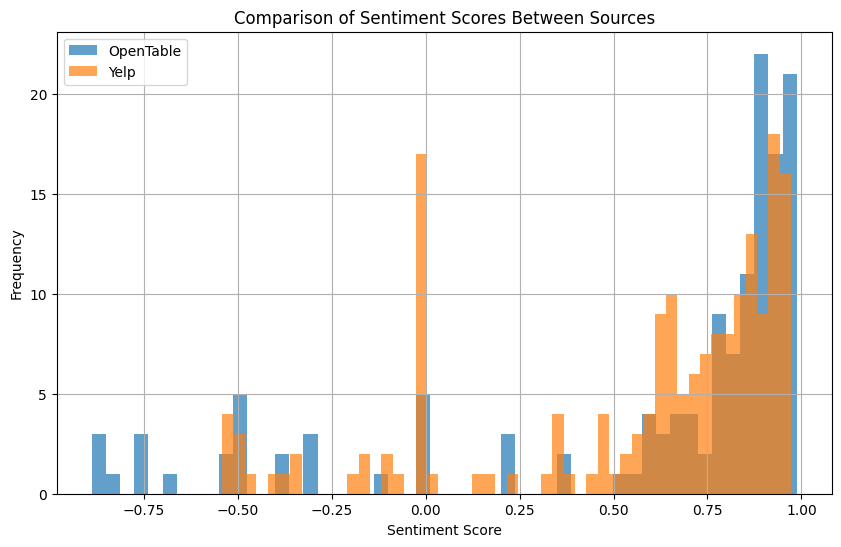

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment-annotated data
opentable_reviews = pd.read_csv(main_path + "opentable_reviews_with_sentiment.csv")
yelp_reviews = pd.read_csv(main_path + "yelp_reviews_with_sentiment.csv")

# Combine datasets for broader analysis
opentable_reviews['source'] = 'OpenTable'
yelp_reviews['source'] = 'Yelp'
combined_reviews = pd.concat([opentable_reviews, yelp_reviews], ignore_index=True)

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

combined_reviews['sentiment_category'] = combined_reviews['sentiment_score'].apply(categorize_sentiment)

# 1. Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
combined_reviews['sentiment_score'].hist(bins=50, alpha=0.7)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# 2. Average Sentiment by Language
avg_sentiment_by_language = combined_reviews.groupby('language')['sentiment_score'].mean().sort_values()
avg_sentiment_by_language.plot(kind='bar', figsize=(10, 6), title="Average Sentiment by Language", xlabel="Language", ylabel="Average Sentiment Score")
plt.show()

# 3. Pie Chart of Sentiment Categories
sentiment_counts = combined_reviews['sentiment_category'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Proportion of Sentiment Categories")
plt.ylabel("")  # Hide y-label for better visuals
plt.show()

# 4. Comparison of Sentiment Between Sources
plt.figure(figsize=(10, 6))
for source in ['OpenTable', 'Yelp']:
    combined_reviews[combined_reviews['source'] == source]['sentiment_score'].hist(bins=50, alpha=0.7, label=source)
plt.title("Comparison of Sentiment Scores Between Sources")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 5. Word Frequency in Positive vs. Negative Reviews (Placeholder for detailed NLP if needed)
# Let me know if you'd like this implemented as well.

/var/folders/yg/gp8smp8d1cx2j1t_sxxl13580000gn/T/ipykernel_11935/1711739008.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Source", loc="upper left")


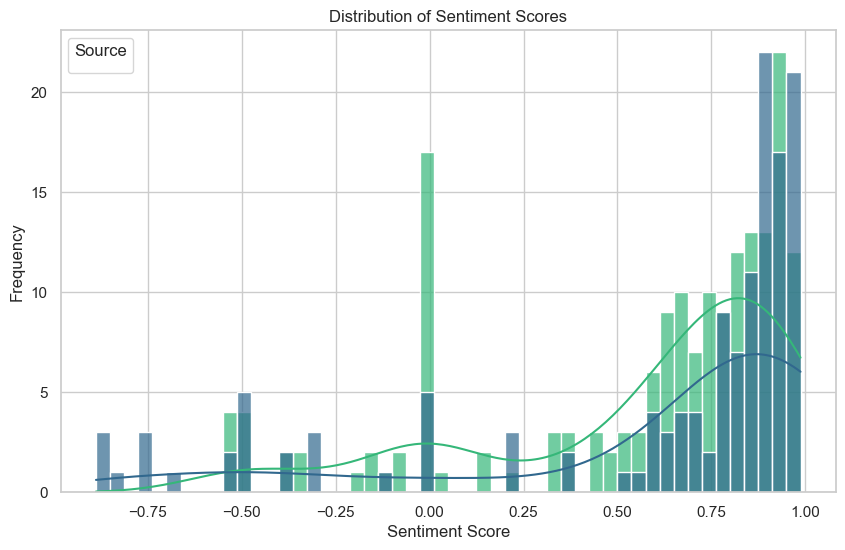

/var/folders/yg/gp8smp8d1cx2j1t_sxxl13580000gn/T/ipykernel_11935/1711739008.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_reviews, x='source', y='sentiment_score', palette="muted")


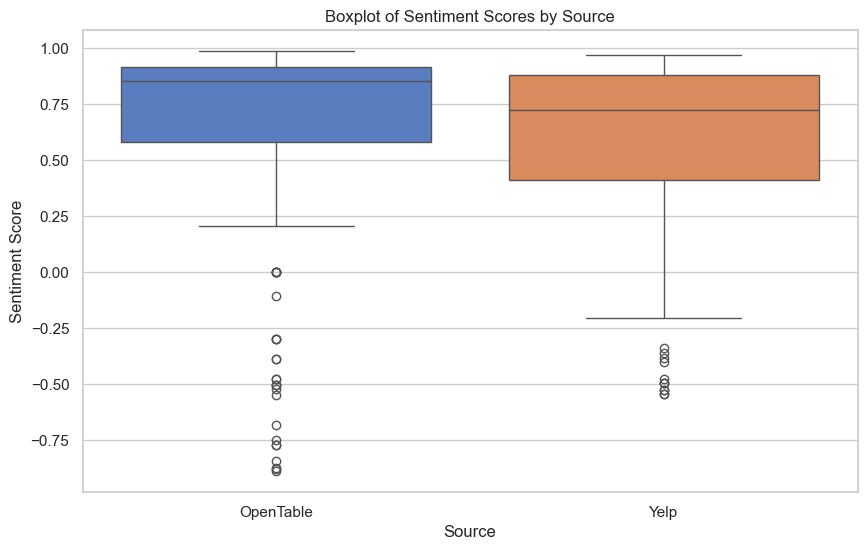

/var/folders/yg/gp8smp8d1cx2j1t_sxxl13580000gn/T/ipykernel_11935/1711739008.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_reviews, x='source', y='sentiment_score', inner="quartile", palette="pastel")


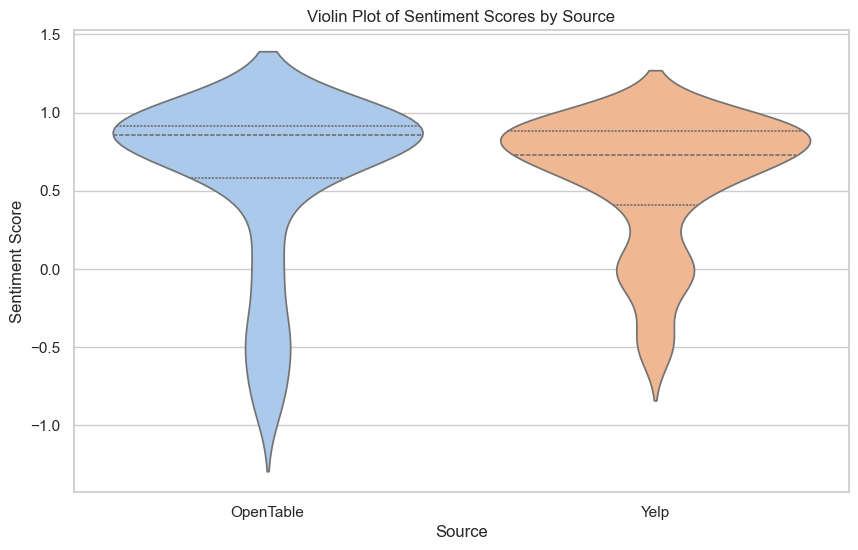

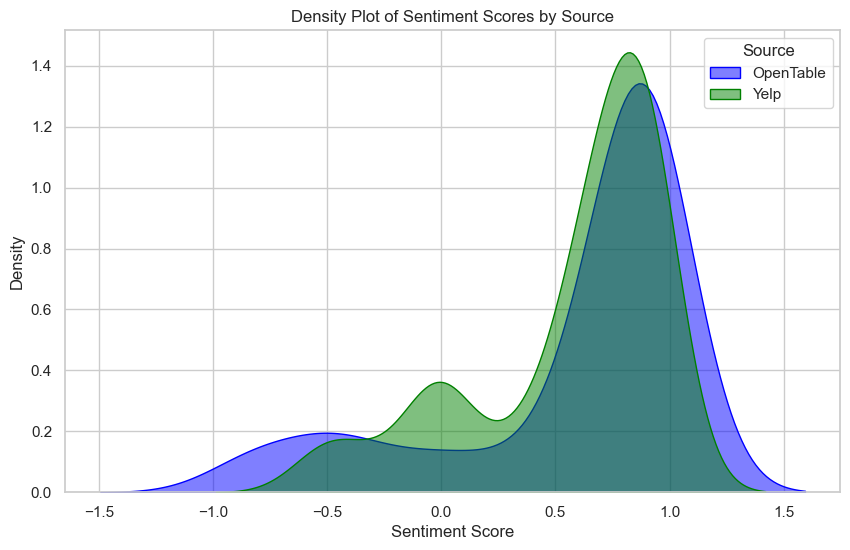

In [15]:
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# 1. Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_reviews, x='sentiment_score', hue='source', kde=True, bins=50, palette="viridis", alpha=0.7)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend(title="Source", loc="upper left")
plt.show()

# 2. Boxplot for Comparison of Sentiment Scores Between Sources
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_reviews, x='source', y='sentiment_score', palette="muted")
plt.title("Boxplot of Sentiment Scores by Source")
plt.xlabel("Source")
plt.ylabel("Sentiment Score")
plt.show()

# 3. Violin Plot for Score Comparison Between Sources
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_reviews, x='source', y='sentiment_score', inner="quartile", palette="pastel")
plt.title("Violin Plot of Sentiment Scores by Source")
plt.xlabel("Source")
plt.ylabel("Sentiment Score")
plt.show()

# 4. Density Plot for Overlapping Sentiment Scores Between Sources
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_reviews[combined_reviews['source'] == 'OpenTable'], x='sentiment_score', fill=True, alpha=0.5, label='OpenTable', color="blue")
sns.kdeplot(data=combined_reviews[combined_reviews['source'] == 'Yelp'], x='sentiment_score', fill=True, alpha=0.5, label='Yelp', color="green")
plt.title("Density Plot of Sentiment Scores by Source")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend(title="Source")
plt.show()


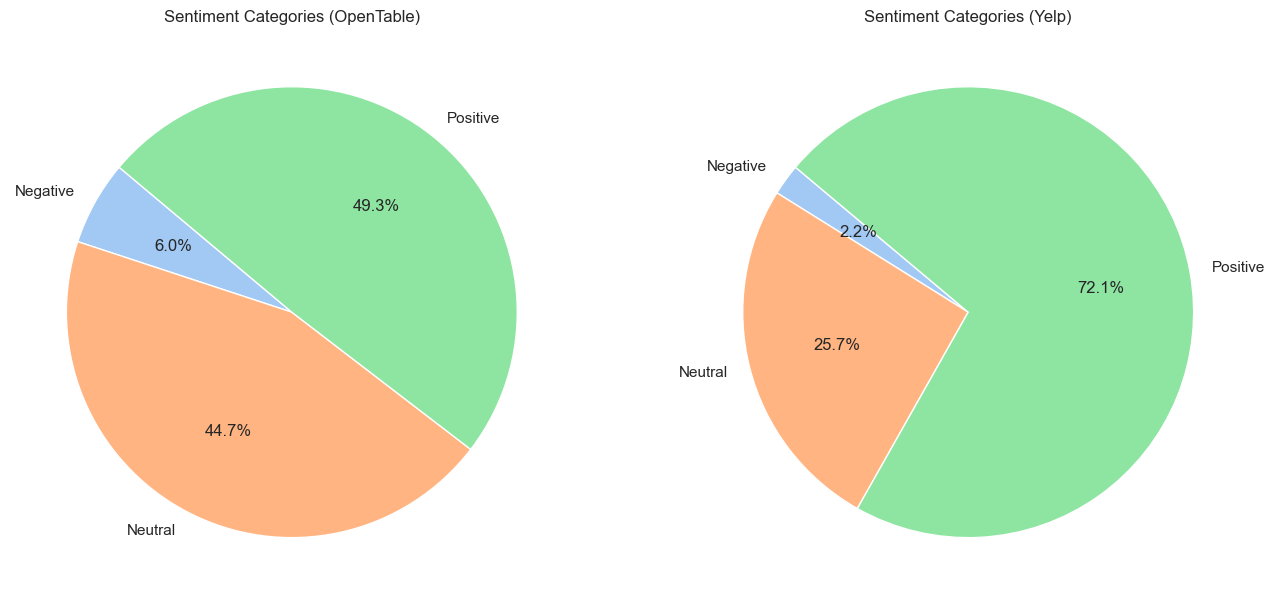

In [17]:
# Calculate proportions for each source
source_sentiment_counts = combined_reviews.groupby('source')['sentiment_category'].value_counts(normalize=True).unstack()

# Create a side-by-side pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

colors = sns.color_palette("pastel")

# Pie for OpenTable
axes[0].pie(
    source_sentiment_counts.loc['OpenTable'],
    labels=source_sentiment_counts.loc['OpenTable'].index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
axes[0].set_title("Sentiment Categories (OpenTable)")

# Pie for Yelp
axes[1].pie(
    source_sentiment_counts.loc['Yelp'],
    labels=source_sentiment_counts.loc['Yelp'].index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
axes[1].set_title("Sentiment Categories (Yelp)")

plt.show()
